## Get Lexicon

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

DATA_FOLDER = './'

In [104]:
import pickle

sender_words_dict = pickle.load(open(DATA_FOLDER + 'sender_words_dict.pickle', 'rb'))
lexicon_all = pickle.load(open(DATA_FOLDER + 'lexicon_all.pickle', 'rb'))

In [105]:
len(sender_words_dict)

68248

In [106]:
from collections import Counter

In [107]:
w_counts = Counter(lexicon_all)

def create_lexicon(w_counts, l_boundary=100, h_boundary=2000 ):
    l2 = []
    for w in w_counts:
        if h_boundary > w_counts[w] > l_boundary:
            l2.append(w)
    return l2

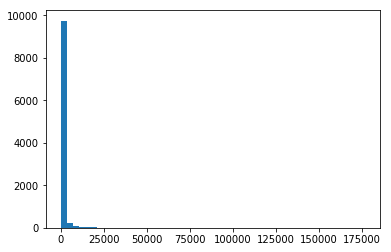

In [108]:
w_counts_new = {}

for k,v in w_counts.items():
    if v > 100:
        w_counts_new[k] = v

plt.hist(list(w_counts_new.values()), bins=50)
plt.show()

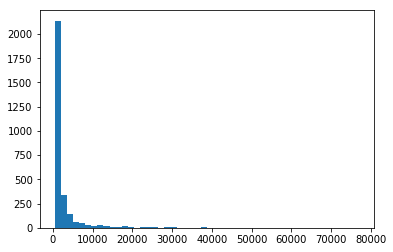

In [117]:
w_counts_new = {}

for k,v in w_counts.items():
    if v > 500 and v < 80000:
        w_counts_new[k] = v

plt.hist(list(w_counts_new.values()), bins=50)
plt.show()

In [132]:
lexicon= create_lexicon(w_counts, l_boundary=500, h_boundary=80000)
# print(lexicon)
print('Train matrix length (lexicon length) {}'.format(len(lexicon)))
print(len(w_counts_new))
pickle.dump(lexicon, open(DATA_FOLDER + 'lexicon.pickle', 'wb'))

Train matrix length (lexicon length) 2920
2920


In [119]:
w_counts['nagel']

46979

In [126]:
w_counts['utopia']

212

In [135]:
w_counts['tara']

141

## Use Lexicon to generate featureset.pickle

In [120]:
import numpy as np

m = len(sender_words_dict) # training example number
n = len(lexicon)           # training matrix number


load_count = 0
for key, words in sender_words_dict.items():
    load_count += 1
    
    features = np.zeros(len(lexicon))
    
    for word in words:
        if word in lexicon:
            index_value = lexicon.index(word)
            features[index_value] += 1
    if load_count == 1:
        featureset = [features]
    else:
        featureset = np.append(featureset, [features], axis=0)
    
    if load_count % 1000 == 1:
        print('Doc number {}.'.format(load_count))

pickle.dump(featureset, open(DATA_FOLDER + 'featureset.pickle', 'wb'))
print(featureset.shape)

Doc number 1.
Doc number 1001.
Doc number 2001.
Doc number 3001.
Doc number 4001.
Doc number 5001.
Doc number 6001.
Doc number 7001.
Doc number 8001.
Doc number 9001.
Doc number 10001.
Doc number 11001.
Doc number 12001.
Doc number 13001.
Doc number 14001.
Doc number 15001.
Doc number 16001.
Doc number 17001.
Doc number 18001.
Doc number 19001.
Doc number 20001.
Doc number 21001.
Doc number 22001.
Doc number 23001.
Doc number 24001.
Doc number 25001.
Doc number 26001.
Doc number 27001.
Doc number 28001.
Doc number 29001.
Doc number 30001.
Doc number 31001.
Doc number 32001.
Doc number 33001.
Doc number 34001.
Doc number 35001.
Doc number 36001.
Doc number 37001.
Doc number 38001.
Doc number 39001.
Doc number 40001.
Doc number 41001.
Doc number 42001.
Doc number 43001.
Doc number 44001.
Doc number 45001.
Doc number 46001.
Doc number 47001.
Doc number 48001.
Doc number 49001.
Doc number 50001.
Doc number 51001.
Doc number 52001.
Doc number 53001.
Doc number 54001.
Doc number 55001.
Doc n

In [47]:
featureset

array([[  2.,  11.,   4.,   3.,   1.,   3.,   6.,   2.,   1.,   1.,   2.,
          6.,   1.,   2.,   2.,   1.,   2.,   1.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   2.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   4.,   0.,   5.,   3.,   0.,   0.,   2.,   0.,   0.,  13.,
          5.,   5.,   9.,   6.,   4.,   7.,   3.,   4.,   5.,   3.,   8.,
          5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        

In [48]:
doc_sender_dict = pickle.load(open(DATA_FOLDER + 'doc_sender_dict.pickle', 'rb'))
len(doc_sender_dict)

11

In [49]:
len(sender_words_dict)

11

In [40]:
doc_sender_dict

{'00001593-256e-46f5-b0a1-bd0c09981c3a': '34219bab-b039-4e8d-8606-d710c5073916',
 '0000322e-16b6-4d36-b72c-5c9d827ba9dc': '42ac4d7a-5502-4111-b5aa-bffa8f3fe43f',
 '0000491b-cd3f-4a83-b738-d08d0cc1eca2': '82d9d472-7812-4e99-9fd2-c017802a3838',
 '000087be-0656-4cc1-a172-69090da03bd1': '73290100-6eaf-4a5a-a0b2-df94f3cedc52',
 '00008e18-c20b-47d5-ab49-b055de1d2e76': 'b8953a41-7ef7-426c-962a-42d8e4d8e36d',
 '000098aa-be74-4d07-b566-21083a71ce6c': 'b986bc24-a596-49c2-b2b2-52df10bbd587',
 '0000a414-0fc3-4a92-aef5-c81758cc8f09': '90166c71-5211-44c4-bd08-607fa0be4469',
 '0000b3e4-10d7-5cac-ac94-1639a6aa8db3': 'd9c5e8e6-c0cf-464e-883d-64be8ba7935f',
 '0000ca1e-e7b0-480a-98f6-160e27273f8f': '7623795a-ed93-4fd3-82af-3bd220953469',
 '0000e943-52cd-4635-945b-424b2e0c8696': 'dc5ae76c-1ce1-45e3-a13b-1bf7edd8c893',
 '0000f186-f949-4586-9175-ab3900fab976': '0ee45dd3-1544-4655-a3d1-a8dcd9207e18'}

In [55]:
sender_id_all = list(doc_sender_dict.values())

In [56]:
sender_id_all

['34219bab-b039-4e8d-8606-d710c5073916',
 '42ac4d7a-5502-4111-b5aa-bffa8f3fe43f',
 '82d9d472-7812-4e99-9fd2-c017802a3838',
 '73290100-6eaf-4a5a-a0b2-df94f3cedc52',
 'b8953a41-7ef7-426c-962a-42d8e4d8e36d',
 'b986bc24-a596-49c2-b2b2-52df10bbd587',
 '90166c71-5211-44c4-bd08-607fa0be4469',
 'd9c5e8e6-c0cf-464e-883d-64be8ba7935f',
 '7623795a-ed93-4fd3-82af-3bd220953469',
 'dc5ae76c-1ce1-45e3-a13b-1bf7edd8c893',
 '0ee45dd3-1544-4655-a3d1-a8dcd9207e18']

In [123]:
import pandas as pd
import numpy as np

doc_sender_dict = pickle.load(open(DATA_FOLDER + 'doc_sender_dict.pickle', 'rb'))
sender_id_all = list(set(doc_sender_dict.values()))

sender_label_int_list = []
for v in doc_sender_dict.values():
    sender_label_int_list.append(sender_id_all.index(v))
    
print(len(sender_label_int_list))

pickle.dump(sender_label_int_list, open(DATA_FOLDER +'labels_int.pickle', 'wb'))
pickle.dump(sender_id_all, open(DATA_FOLDER +'sender_id_all.pickle', 'wb'))

68248


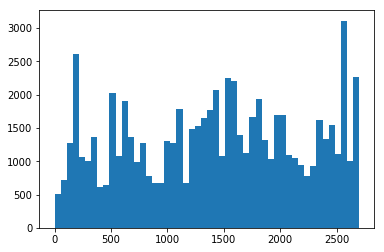

In [125]:
plt.hist(sender_label_int_list, bins=50)
plt.show()

In [130]:
sender_id = doc_sender_dict['0257ef66-608e-4804-875d-d615e584c688']

sender_id_all.index(sender_id)

1637

In [50]:
import pandas as pd
doc_sender_dict = pickle.load(open(DATA_FOLDER + 'doc_sender_dict.pickle', 'rb'))

df = pd.DataFrame.from_dict(doc_sender_dict, orient='index')
df = pd.get_dummies(df)
df.as_matrix()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

## Generate labels.pickle

In [51]:
import pandas as pd
doc_sender_dict = pickle.load(open('./sub_data/doc_sender_dict.pickle', 'rb'))

df = pd.DataFrame.from_dict(doc_sender_dict, orient='index')
df = pd.get_dummies(df)
pickle.dump(df.as_matrix(), open(DATA_FOLDER +'labels.pickle', 'wb'))

In [131]:
DATA_FOLDER

'./'

In [133]:
sender_id_all[177]

'd262a5d1-9edb-4e52-9070-b226829ad43a'

In [134]:
pickle.dump(sender_id_all, open(DATA_FOLDER +'sender_id_all.pickle', 'wb'))